# Projeto 2 de Ciência dos Dados - Predição de crimes em São Francisco

#### Turma 2b
Rafael Kahn<br>
Hélio Zaia<br>
Gabriel Parfan<br>

## Introdução

## Objetivo

## Preparo do dataset

In [35]:
#Bibliotecas
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, uniform, probplot
import seaborn

In [66]:
#função para gerar crosstabs com a correlação entre valores escolhidos
def corrtab_data(data):

        lt = []

        for a in range(len(data.index)):
            k = np.corrcoef(data.loc[data.index[a],:],range(0,len(data.columns))) [0,1]
            lt.append(k)

        dic = dict(zip(data.index,lt))

        return dic
    


In [78]:
def kkkj(data):

    lt1=[]
    lt2=[]

    for a in range(len(data.index)):
        k1 = np.corrcoef(data.loc[data.index[a],:],range(0,len(data.index))) [0,1]
        lt1.append(k1)

    for a in range(len(data.columns)):
        k2 = np.corrcoef(data.loc[data.columns[a],:],range(0,len(data.columns))) [0,1]
        lts.append(k2)

    dic = dict(zip(lt1,lt2))
    
    return dic


In [38]:
#Abrindo o dataset
data = pd.read_csv("Crimes_SF.csv")
data.head(10)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,Saturday,01/02/2016 12:00:00 AM,00:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)",16000313026150
7,160003259,NON-CRIMINAL,FIRE REPORT,Saturday,01/02/2016 12:00:00 AM,01:02,TENDERLOIN,NONE,200 Block of EDDY ST,-122.411778,37.783981,"(37.7839805592634, -122.411778295992)",16000325968000
8,160003970,WARRANTS,WARRANT ARREST,Saturday,01/02/2016 12:00:00 AM,12:21,SOUTHERN,"ARREST, BOOKED",4TH ST / BERRY ST,-122.393357,37.775788,"(37.7757876218293, -122.393357241451)",16000397063010
9,160003641,MISSING PERSON,FOUND PERSON,Friday,01/01/2016 12:00:00 AM,10:06,BAYVIEW,NONE,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)",16000364175000


In [39]:
#Limpeza Inicial
#Deixando apenas os crimes mais relevantes (inicialmente 4)
data_f = data[(data['Category'] == 'LARCENY/THEFT') | (data['Category'] == 'ASSAULT') | (data['Category'] == 'VANDALISM') | (data['Category'] == 'VEHICLE THEFT')]
data_f.Category.value_counts()

LARCENY/THEFT    40409
ASSAULT          13577
VANDALISM         8589
VEHICLE THEFT     6419
Name: Category, dtype: int64

## Análise Exploratória


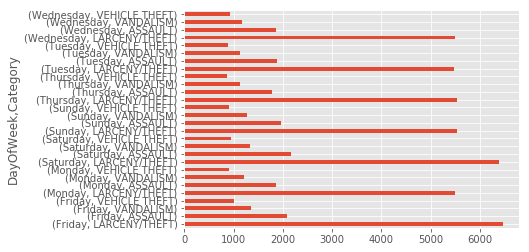

In [40]:
data_f.groupby('DayOfWeek').Category.value_counts().plot.barh()
plt.style.use("ggplot")
plt.grid(True)

In [41]:
tabela_ds = pd.crosstab(data_f.Category, data_f.DayOfWeek, normalize = 'index')
tabela_ds

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Category,,,,,,,
ASSAULT,0.153348,0.137365,0.158872,0.144804,0.131251,0.137954,0.136407
LARCENY/THEFT,0.160286,0.136183,0.157985,0.136875,0.137049,0.135440,0.136183
VANDALISM,0.157178,0.140296,0.153918,0.148213,0.132146,0.132029,0.136221
VEHICLE THEFT,0.155632,0.140676,0.145817,0.142546,0.133354,0.137249,0.144727


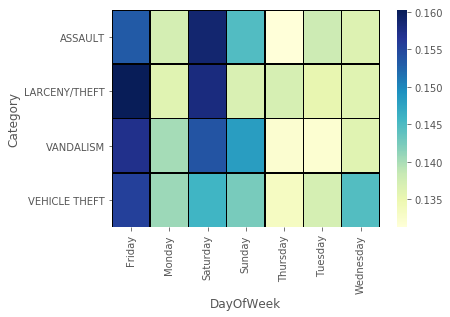

In [42]:
seaborn.heatmap(tabela_ds, annot = False, fmt = 'd',linecolor="blacK",linewidth=.5,cmap='YlGnBu')

In [43]:
tabela_ho = pd.crosstab(data_f.Category, data_f.Time, normalize = 'index')
tabela_ho.head(10)

Time,00:01,00:02,00:03,00:04,00:05,00:06,00:07,00:08,00:09,00:10,...,23:50,23:51,23:52,23:53,23:54,23:55,23:56,23:57,23:58,23:59
Category,,,,,,,,,,,,,,,,,,,,,
ASSAULT,0.015762,0.000368,0.000589,0.000074,0.001105,0.000295,0.000295,0.000884,0.000074,0.001178,...,0.001841,0.000884,0.000442,0.000147,0.000442,0.000663,0.000074,0.000074,0.000368,0.000663
LARCENY/THEFT,0.018709,0.000173,0.000124,0.000173,0.001262,0.000099,0.000025,0.000148,0.000049,0.000495,...,0.001213,0.000025,0.000049,0.000099,0.000173,0.000841,0.000000,0.000049,0.000198,0.000693
VANDALISM,0.019793,0.000349,0.000349,0.000116,0.001164,0.000116,0.000116,0.000000,0.000466,0.000815,...,0.000815,0.000349,0.000233,0.000233,0.000349,0.001048,0.000116,0.000233,0.000233,0.000699
VEHICLE THEFT,0.020876,0.000156,0.000000,0.000000,0.000779,0.000000,0.000000,0.000156,0.000156,0.000623,...,0.000935,0.000000,0.000000,0.000000,0.000000,0.000623,0.000000,0.000000,0.000000,0.002181


In [44]:
#horario = tabela_ho.columns  

data_f["Hour"] = data_f.Time.str.slice(0,3) + "00"
    
data_f["Hour"].value_counts()
tabela_Category_Time = pd.crosstab(data_f.Category, data_f.Hour, normalize='index')
tabela_Category_Time

C:\Users\helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Hour,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
Category,,,,,,,,,,,,,,,,,,,,,
ASSAULT,0.048612,0.043088,0.039552,0.023348,0.015025,0.010533,0.017603,0.026074,0.033365,0.036385,...,0.046991,0.055903,0.055535,0.058039,0.051779,0.051337,0.054651,0.059070,0.048538,0.046476
LARCENY/THEFT,0.034423,0.025415,0.016110,0.009676,0.006682,0.007449,0.010913,0.015318,0.027073,0.032196,...,0.053948,0.054122,0.058626,0.068772,0.080477,0.080304,0.070009,0.056374,0.047588,0.042812
VANDALISM,0.041565,0.035161,0.028059,0.025731,0.019793,0.016416,0.020142,0.023518,0.032949,0.030621,...,0.042496,0.044010,0.045523,0.065200,0.073699,0.071021,0.062871,0.063453,0.064152,0.054954
VEHICLE THEFT,0.034585,0.026328,0.016669,0.011061,0.008880,0.010438,0.019629,0.025705,0.033339,0.034429,...,0.037701,0.040972,0.052656,0.073064,0.083969,0.073687,0.080542,0.072597,0.076803,0.062627


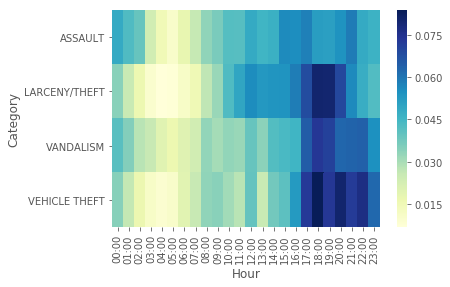

In [45]:
seaborn.heatmap(tabela_Category_Time, annot = False, fmt = 'd', cmap='YlGnBu')

In [67]:

Corr_Category_Hour = corrtab_data(tabela_Category_Time)

tabela_Corr_Category_Hour = pd.DataFrame([Corr_Category_Hour])
tabela_Corr_Category_Hour

,ASSAULT,LARCENY/THEFT,VANDALISM,VEHICLE THEFT
0,0.657891,0.785558,0.812729,0.862514


In [47]:
tabela_Category_District = pd.crosstab(data_f.Category, data_f.PdDistrict, normalize = 'index')
tabela_Category_District

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Category,,,,,,,,,,
ASSAULT,0.130736,0.087427,0.110923,0.155410,0.113133,0.038595,0.034838,0.173234,0.067614,0.088090
LARCENY/THEFT,0.058330,0.166799,0.044075,0.082187,0.178653,0.055039,0.077534,0.227752,0.064467,0.045164
VANDALISM,0.123297,0.133659,0.088602,0.127023,0.139597,0.052858,0.055536,0.167540,0.072418,0.039469
VEHICLE THEFT,0.168406,0.074934,0.142546,0.145194,0.115127,0.070416,0.080231,0.095498,0.083814,0.023835


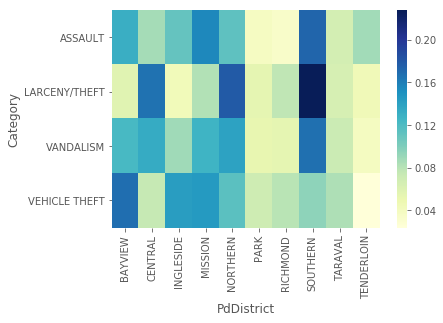

In [48]:
seaborn.heatmap(tabela_Category_District, annot = False, fmt = 'd', cmap='YlGnBu')

In [49]:
tabela_Hour_District = pd.crosstab(data_f.PdDistrict, data_f.Hour, normalize = 'index')
tabela_Hour_District

Hour,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
PdDistrict,,,,,,,,,,,,,,,,,,,,,
BAYVIEW,0.040497,0.026148,0.020568,0.018017,0.015147,0.012277,0.021843,0.023119,0.037628,0.032526,...,0.040179,0.042411,0.051658,0.064573,0.078125,0.078284,0.072545,0.069515,0.057876,0.050064
CENTRAL,0.031917,0.024697,0.021557,0.012662,0.007011,0.008686,0.010046,0.014964,0.025952,0.033905,...,0.058811,0.056195,0.059334,0.071683,0.080892,0.075345,0.068648,0.056404,0.050126,0.038510
INGLESIDE,0.043119,0.034052,0.024985,0.017731,0.011485,0.013903,0.013903,0.023574,0.035059,0.031433,...,0.044127,0.043724,0.054604,0.060044,0.065485,0.073947,0.069514,0.070723,0.062664,0.059238
MISSION,0.044808,0.046284,0.030990,0.022002,0.013952,0.009525,0.018514,0.022672,0.030588,0.034210,...,0.041857,0.046016,0.045613,0.063053,0.066541,0.063724,0.069359,0.060504,0.062248,0.057285
NORTHERN,0.037408,0.034789,0.021416,0.013654,0.008136,0.008043,0.013560,0.016366,0.030113,0.032732,...,0.045918,0.052464,0.055924,0.065183,0.079772,0.076218,0.071542,0.058636,0.051248,0.049472
PARK,0.024083,0.025178,0.018062,0.009031,0.010126,0.007663,0.015599,0.022715,0.027641,0.038862,...,0.051177,0.056377,0.064587,0.064313,0.068692,0.064587,0.065134,0.060482,0.054735,0.041872
RICHMOND,0.024793,0.017834,0.012614,0.004567,0.008047,0.008482,0.010439,0.013919,0.026968,0.030231,...,0.063288,0.061114,0.058721,0.071118,0.079165,0.080687,0.067203,0.055676,0.041757,0.031100
SOUTHERN,0.042846,0.029103,0.023076,0.011906,0.009113,0.007864,0.013449,0.018887,0.026383,0.033659,...,0.050856,0.053061,0.056662,0.069744,0.073271,0.073639,0.059896,0.053428,0.050195,0.050121
TARAVAL,0.046124,0.027760,0.017937,0.015802,0.010677,0.009396,0.013239,0.023276,0.031390,0.027119,...,0.050395,0.053385,0.052530,0.060858,0.071322,0.077087,0.070895,0.065343,0.054025,0.043562


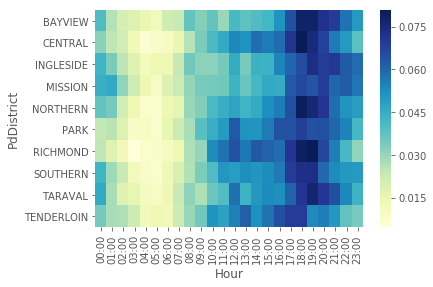

In [50]:
seaborn.heatmap(tabela_Hour_District, annot = False, fmt = 'd', cmap='YlGnBu')

In [71]:
Corr_Hour_District = corrtab_data(tabela_Hour_District)

tabela_Corr_Hour_District = pd.DataFrame([Corr_Hour_District])
tabela_Corr_Hour_District

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,0.824467,0.781736,0.838269,0.768531,0.796341,0.831077,0.74024,0.776763,0.78569,0.658586


In [52]:
tabela_DayOfWeek_Hour = pd.crosstab(data_f.DayOfWeek, data_f.Hour, normalize = 'index')

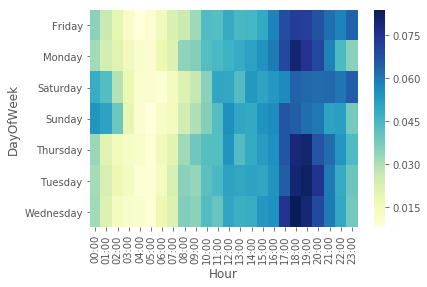

In [53]:
seaborn.heatmap(tabela_DayOfWeek_Hour, annot = False, fmt = 'd', cmap='YlGnBu')

In [72]:
Corr_DayOfWeek_Hour = corrtab_data(tabela_DayOfWeek_Hour)

tabela_Corr_DayOfWeek_Hour = pd.DataFrame([Corr_DayOfWeek_Hour])
tabela_Corr_DayOfWeek_Hour

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.883613,0.774155,0.769611,0.569905,0.833165,0.803254,0.798215


In [55]:
tabela_DayOfWeek_District =  pd.crosstab(data_f.DayOfWeek, data_f.PdDistrict, normalize = 'index')

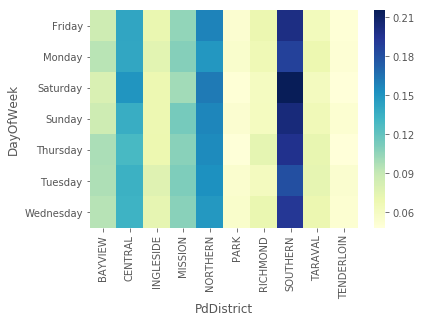

In [56]:
seaborn.heatmap(tabela_DayOfWeek_District, annot = False, fmt = 'd', cmap='YlGnBu')

In [79]:
kkkj(tabela_DayOfWeek_District)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
len(tabela_DayOfWeek_District.index)

In [ ]:
len(tabela_DayOfWeek_District.columns)

## Conclusão

## Fontes:
